In [1]:
import pandas as pd
import numpy as np
from autoviml.Auto_ViML import Auto_ViML
from sklearn.model_selection import train_test_split, cross_validate
import shap

# London Crime Records

In [2]:
outcome_df = pd.read_csv('data/london-outcomes.csv')
street_df = pd.read_csv('data/london-street.csv')
londpol_df = outcome_df.merge(street_df, on='Crime ID')
londpol_df.head()

,Crime ID,Month_x,Reported by_x,Falls within_x,Longitude_x,Latitude_x,Location_x,LSOA code_x,LSOA name_x,Outcome type,...,Reported by_y,Falls within_y,Longitude_y,Latitude_y,Location_y,LSOA code_y,LSOA name_y,Crime type,Last outcome category,Context
0,b4adcc899360d595450a35cbe4d7d71d295bafefef98b2...,2014-06,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Suspect charged,...,City of London Police,City of London Police,NaN,NaN,No Location,NaN,NaN,Drugs,Court result unavailable,NaN
1,b4adcc899360d595450a35cbe4d7d71d295bafefef98b2...,2014-06,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Offender fined,...,City of London Police,City of London Police,NaN,NaN,No Location,NaN,NaN,Drugs,Court result unavailable,NaN
2,64b14e3efdf9e12425e3ac19f5e72b6d19b5656523d91b...,2014-06,City of London Police,City of London Police,-0.088843,51.509532,On or near Parking Area,E01032739,City of London 001F,Investigation complete; no suspect identified,...,City of London Police,City of London Police,-0.088843,51.509532,On or near Parking Area,E01032739,City of London 001F,Other theft,Investigation complete; no suspect identified,NaN
3,d9909143deda1db75d8ba35b701f31b268d9273764ad42...,2014-06,City of London Police,City of London Police,-0.084701,51.509320,On or near LOWER THAMES STREET,E01032739,City of London 001F,Investigation complete; no suspect identified,...,City of London Police,City of London Police,-0.084701,51.509320,On or near Lower Thames Street,E01032739,City of London 001F,Other theft,Investigation complete; no suspect identified,NaN
4,bd44c99de1bdc727abc7c682bf3916969a3bc673e93093...,2014-06,City of London Police,City of London Police,-0.079080,51.519615,On or near BISHOPSGATE,E01004307,Tower Hamlets 015B,Formal action is not in the public interest,...,City of London Police,City of London Police,-0.079080,51.519615,On or near Bishopsgate,E01004307,Tower Hamlets 015B,Possession of weapons,Formal action is not in the public interest,NaN


In [3]:
londpol_df['Crime type'].value_counts()

Violence and sexual offences    678523
Other theft                     261078
Shoplifting                     165572
Burglary                        152189
Public order                    149687
Drugs                           139300
Criminal damage and arson       128833
Vehicle crime                   120950
Robbery                          84186
Theft from the person            73573
Other crime                      34866
Bicycle theft                    30112
Possession of weapons            19344
Name: Crime type, dtype: int64

In [3]:
df = londpol_df.copy(deep=True).drop('Context', axis=1)
X = df.drop('Crime type', axis=1)
y=df['Crime type']

#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)

train, test = X_train.join(y_train), X_val.join(y_val)

Train (Size: 1375793,20) has Single_Label with target: ['Crime type']
"
 ################### Multi-Class ######################
Shuffling the data set before training
 Class  -> Counts -> Percent
Burglary:  102757  ->    7.5%
Other theft:  176165  ->   12.8%
Criminal damage and arson:   86935  ->    6.3%
Shoplifting:  111716  ->    8.1%
Violence and sexual offences:  458300  ->   33.3%
Robbery:   56714  ->    4.1%
Public order:  100870  ->    7.3%
Bicycle theft:   20351  ->    1.5%
Theft from the person:   49865  ->    3.6%
Vehicle crime:   81523  ->    5.9%
 Drugs:   94023  ->    6.8%
Possession of weapons:   13023  ->    0.9%
Other crime:   23551  ->    1.7%
Selecting 13-Class Classifier...
    Using GridSearchCV for Hyper Parameter tuning...
String or Multi Class target: Crime type transformed as follows: {'Other theft': 0, 'Violence and sexual offences': 1, 'Shoplifting': 2, 'Vehicle crime': 3, 'Other crime': 4, 'Criminal damage and arson': 5, 'Drugs': 6, 'Robbery': 7, 'Theft from 

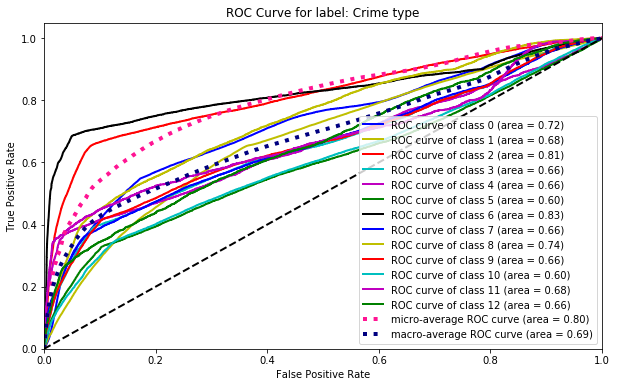

Average precision score, micro-averaged over all classes: 0.33
Macro F1 score, averaged over all classes: 0.31


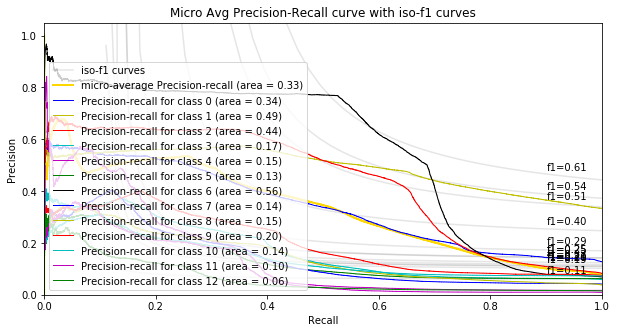

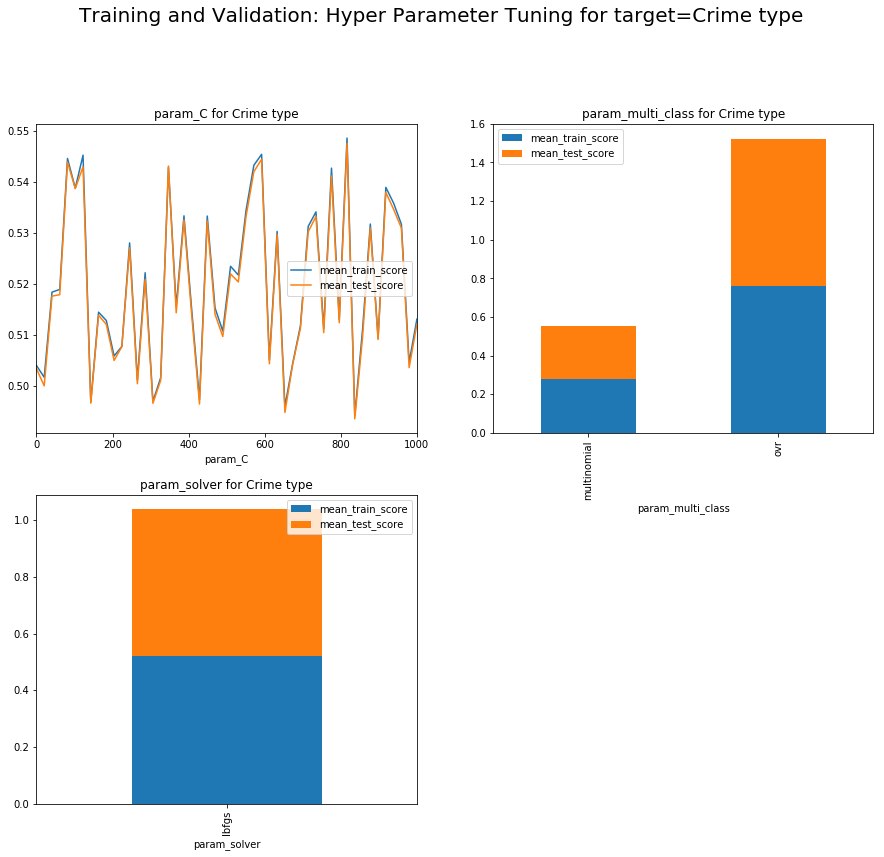

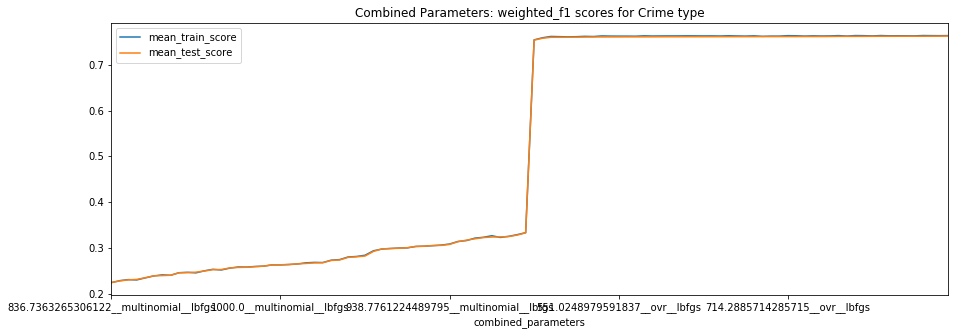

    Time taken for this Target (in seconds) = 168374
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Leaving Top 1 continuous variables as is...
    No Entropy Binning specified
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Adding 13 Stacking feature(s) to training data
Number of numeric variables = 1
    No variables were removed since no highly correlated variables found in data
    Adding 27 categorical variables to reduced numeric variables  of 1
Selected No. of variables = 28 
Finding Important Features...
        in 28 variables
        in 22 variables
        in 16 variables
        in 10 variables
        in 4 variables
    Found 28 important features

Imbalanced Class Training using Majority Class Downsampling method...
Rare Class = 11
    Pct of Rare Class in data = 0.95%
   

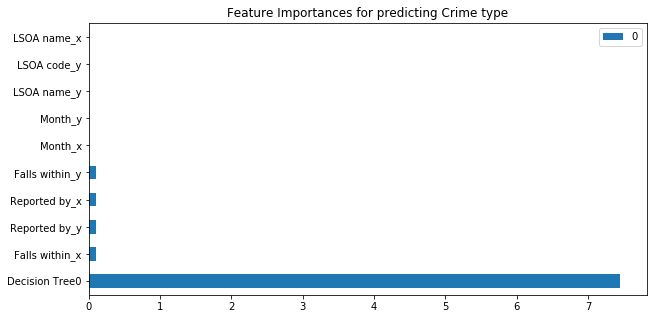

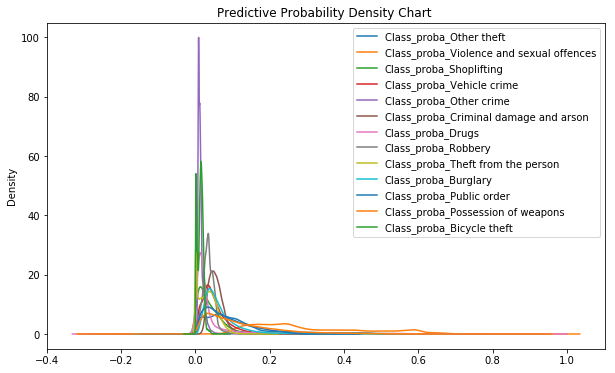

In [5]:
model_crime, features_crime, trainm_crime, testm_crime = Auto_ViML(train, 'Crime type', test, verbose=2, scoring_parameter='weighted_f1', Imbalanced_Flag=True, Stacking_Flag=True)

Train (Size: 1375793,20) has Single_Label with target: ['Crime type']
"
 ################### Multi-Class ######################
Shuffling the data set before training
 Class  -> Counts -> Percent
Burglary:  102757  ->    7.5%
Other theft:  176165  ->   12.8%
Criminal damage and arson:   86935  ->    6.3%
Shoplifting:  111716  ->    8.1%
Violence and sexual offences:  458300  ->   33.3%
Robbery:   56714  ->    4.1%
Public order:  100870  ->    7.3%
Bicycle theft:   20351  ->    1.5%
Theft from the person:   49865  ->    3.6%
Vehicle crime:   81523  ->    5.9%
 Drugs:   94023  ->    6.8%
Possession of weapons:   13023  ->    0.9%
Other crime:   23551  ->    1.7%
Selecting 13-Class Classifier...
    Using GridSearchCV for Hyper Parameter tuning...
String or Multi Class target: Crime type transformed as follows: {'Other theft': 0, 'Violence and sexual offences': 1, 'Shoplifting': 2, 'Vehicle crime': 3, 'Other crime': 4, 'Criminal damage and arson': 5, 'Drugs': 6, 'Robbery': 7, 'Theft from 

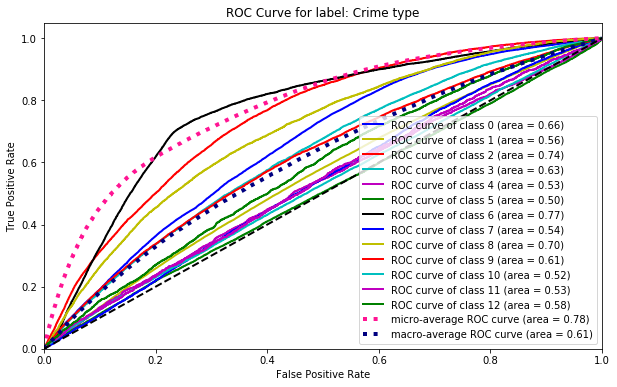

Average precision score, micro-averaged over all classes: 0.24
Macro F1 score, averaged over all classes: 0.06


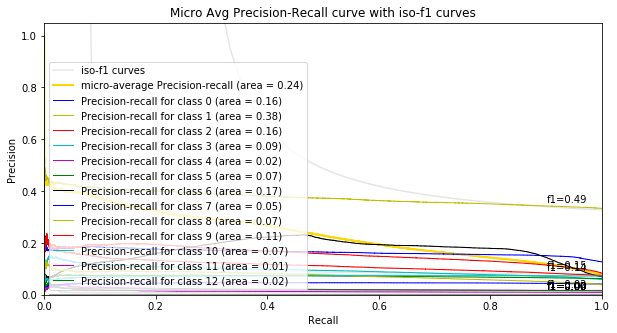

After multiple models, Ensemble Model Results:
              precision    recall  f1-score   support

           0       0.39      0.48      0.43     26205
           1       0.40      0.69      0.51     68797
           2       0.07      0.16      0.10     16952
           3       0.02      0.02      0.02     12155
           4       0.00      0.01      0.01      3498
           5       0.01      0.00      0.00     12930
           6       0.78      0.00      0.01     14190
           7       0.00      0.00      0.00      8547
           8       0.00      0.00      0.00      7716
           9       0.00      0.00      0.00     15392
          10       0.00      0.00      0.00     14966
          11       0.00      0.00      0.00      1931
          12       0.00      0.00      0.00      3090

   micro avg       0.31      0.31      0.31    206369
   macro avg       0.13      0.11      0.08    206369
weighted avg       0.24      0.31      0.23    206369

[[12638 10630  2534   366    35 

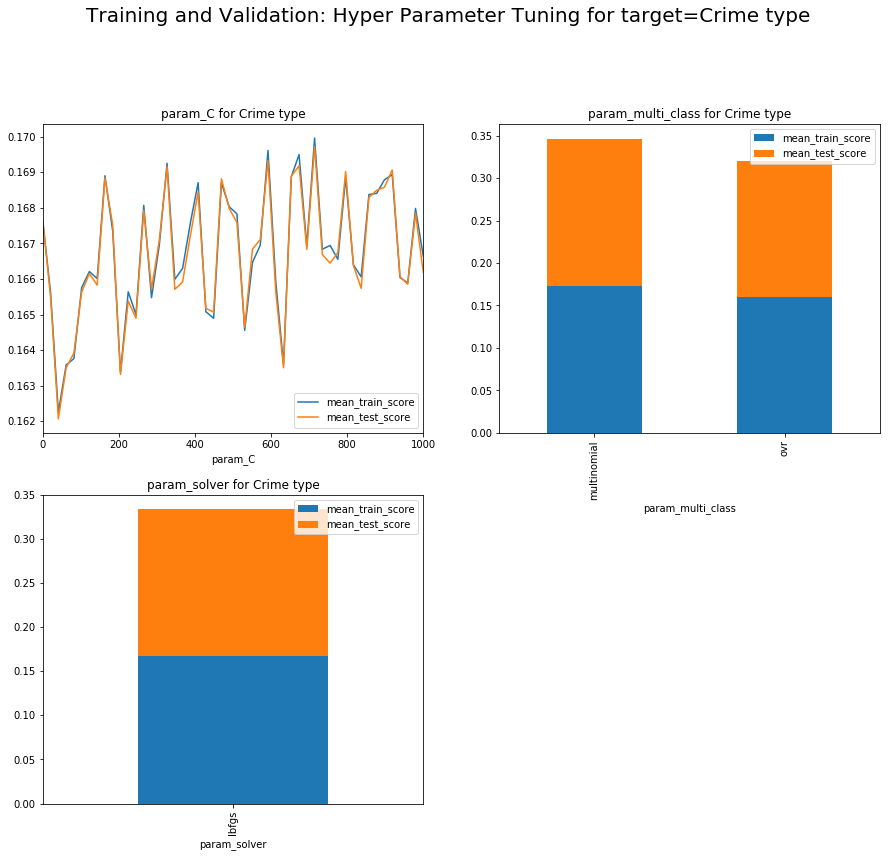

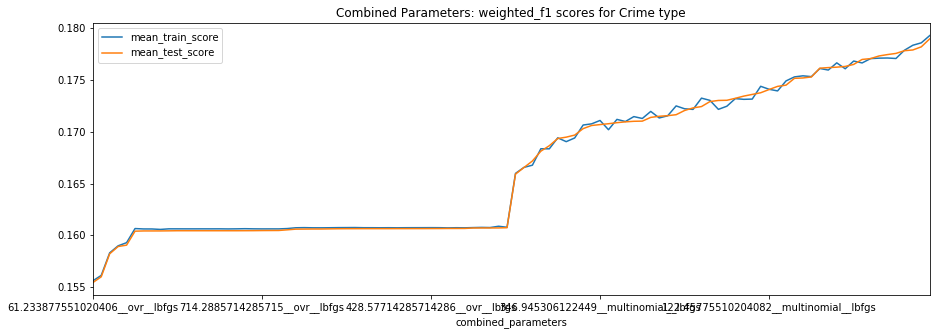

    Time taken for this Target (in seconds) = 122918
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Leaving Top 1 continuous variables as is...
    No Entropy Binning specified
Number of numeric variables = 1
    No variables were removed since no highly correlated variables found in data
    Adding 14 categorical variables to reduced numeric variables  of 1
Selected No. of variables = 15 
Finding Important Features...
        in 15 variables
        in 12 variables
        in 9 variables
        in 6 variables
        in 3 variables
    Found 15 important features

Imbalanced Class Training using Majority Class Downsampling method...
Rare Class = 11
    Pct of Rare Class in data = 0.95%
    Number of iterations for training =  11
  Rare Class Batch Size = 13023
  Majority Class Batch Size = 123888
     1. Trainin

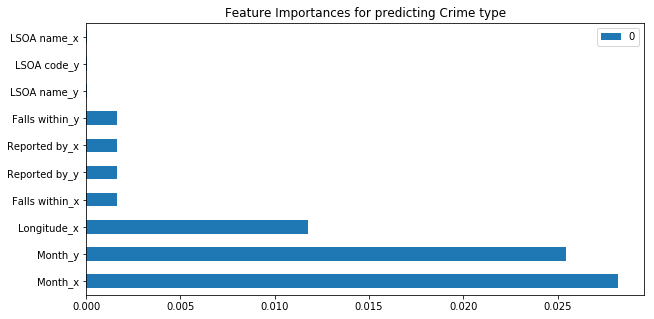

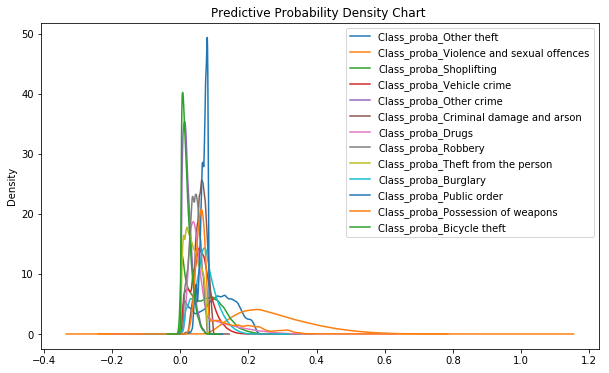

In [4]:
model_crime2, features_crime2, trainm_crime2, testm_crime2 = Auto_ViML(train, 'Crime type', test, verbose=2, scoring_parameter='weighted_f1', Imbalanced_Flag=True)

# Ames Housing

In [2]:
housing_df = pd.read_csv('data/AmesHousing.csv')
housing_df = housing_df.drop(['Alley', 'Pool QC', 'Misc Feature','Fence', 'Fireplace Qu', 'Lot Frontage'], axis=1)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 76 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Area           2930 non-null int64
Street             2930 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2930 non-null object
Exterior 1st       29

In [3]:
df = housing_df.copy(deep=True)

test_sample = df.sample(int(df.shape[0] * .20), random_state=99)
train, test = df[~df.isin(test_sample)].dropna(), df[df.isin(test_sample)].dropna()

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 1 to 2929
Data columns (total 76 columns):
Order              532 non-null float64
PID                532 non-null float64
MS SubClass        532 non-null float64
MS Zoning          532 non-null object
Lot Area           532 non-null float64
Street             532 non-null object
Lot Shape          532 non-null object
Land Contour       532 non-null object
Utilities          532 non-null object
Lot Config         532 non-null object
Land Slope         532 non-null object
Neighborhood       532 non-null object
Condition 1        532 non-null object
Condition 2        532 non-null object
Bldg Type          532 non-null object
House Style        532 non-null object
Overall Qual       532 non-null float64
Overall Cond       532 non-null float64
Year Built         532 non-null float64
Year Remod/Add     532 non-null float64
Roof Style         532 non-null object
Roof Matl          532 non-null object
Exterior 1st       532 non-n

Train (Size: 2146,76) has Single_Label with target: ['SalePrice']
"
 ################### Regression  ######################
Classifying variables in data set...
    Number of Numeric Columns =  23
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  47
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    75 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Test data has no missing values...
Number of numeric variables = 23
    Number of variables removed due to high correlation = 2 
    List of variables removed: ['1st Flr SF', 'Garage Yr Blt']

Target Ready for Modeling: SalePr

<Figure size 720x432 with 0 Axes>

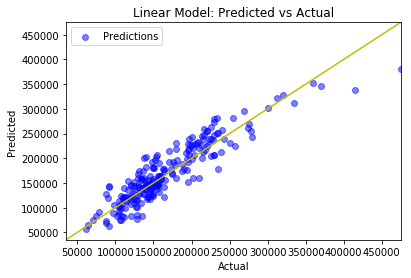

    MAE = 20144.1034
    MAPE = 13%
    RMSE = 25640.7859
    MAE as % std dev of Actuals = 32.6%
    Normalized RMSE (% of MinMax of Actuals) = 6%
    Normalized RMSE (% of Std Dev of Actuals) = 41%
QuickML_Ensembling Model results:
    Bagging1 = 25841.9532 
    LassoCV Regularization = 24633.4304
    RidgeCV Regression = 24672.3164 
    Boosting = 58066.1755
########################################################
Completed Ensemble predictions on held out data


<Figure size 720x432 with 0 Axes>

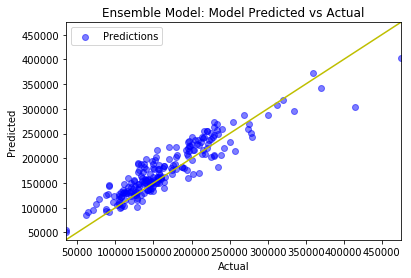

    MAE = 20403.1243
    MAPE = 14%
    RMSE = 25929.3729
    MAE as % std dev of Actuals = 33.0%
    Normalized RMSE (% of MinMax of Actuals) = 6%
    Normalized RMSE (% of Std Dev of Actuals) = 42%
After multiple models, Ensemble Model Results:
    RMSE Score = nan

Single Model is better than Ensembling Models for this data set.


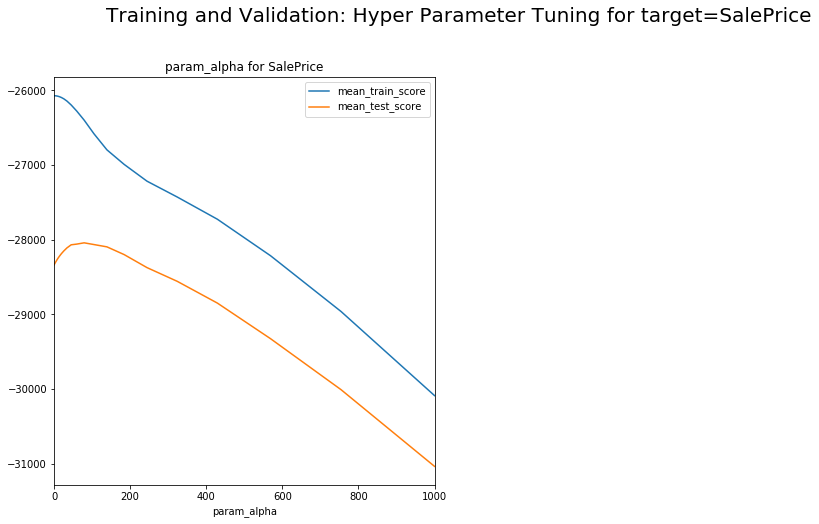

    Time taken for this Target (in seconds) = 4
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Leaving Top 10 continuous variables as is...
    No Entropy Binning specified
Number of numeric variables = 10
    No variables were removed since no highly correlated variables found in data
    Adding 35 categorical variables to reduced numeric variables  of 10
Selected No. of variables = 45 
Finding Important Features...
        in 45 variables
[19:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
        in 36 variables
[19:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
        in 27 variables
[19:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear

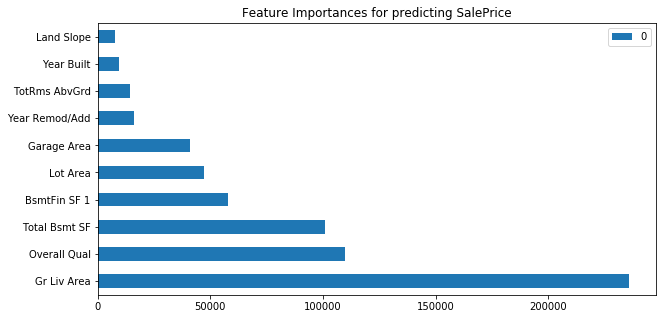

In [60]:
model_home, features_home, trainm_home, testm_home = Auto_ViML(train, 'SalePrice', test, verbose=2, scoring_parameter='r2', Boosting_Flag=True)

Train (Size: 2146,76) has Single_Label with target: ['SalePrice']
"
 ################### Regression  ######################
Classifying variables in data set...
    Number of Numeric Columns =  23
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  47
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    75 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Test data has no missing values...
Number of numeric variables = 23
    Number of variables removed due to high correlation = 2 
    List of variables removed: ['1st Flr SF', 'Garage Yr Blt']

Target Ready for Modeling: SalePr

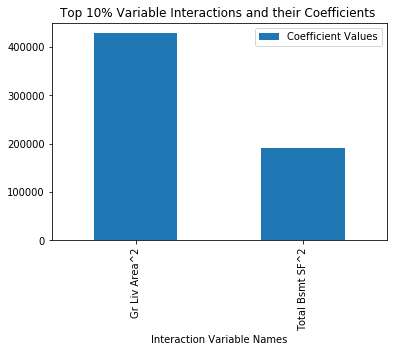

<Figure size 720x432 with 0 Axes>

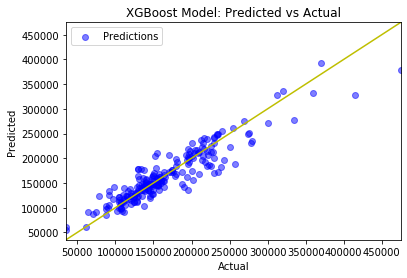

    MAE = 16467.8054
    MAPE = 11%
    RMSE = 23190.6352
    MAE as % std dev of Actuals = 26.7%
    Normalized RMSE (% of MinMax of Actuals) = 5%
    Normalized RMSE (% of Std Dev of Actuals) = 38%
QuickML_Ensembling Model results:
    LassoLarsCV Regression = 22403.0103 
    LassoCV Regularization = 22371.9834
    RidgeCV Regression = 22377.7622 
    Bagging2 = 26836.6110
########################################################
Completed Ensemble predictions on held out data


<Figure size 720x432 with 0 Axes>

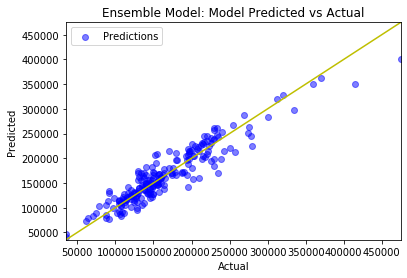

    MAE = 16329.6857
    MAPE = 10%
    RMSE = 21278.9368
    MAE as % std dev of Actuals = 26.4%
    Normalized RMSE (% of MinMax of Actuals) = 5%
    Normalized RMSE (% of Std Dev of Actuals) = 34%
After multiple models, Ensemble Model Results:
    RMSE Score = nan

Single Model is better than Ensembling Models for this data set.
Could not plot Cross Validation Parameters


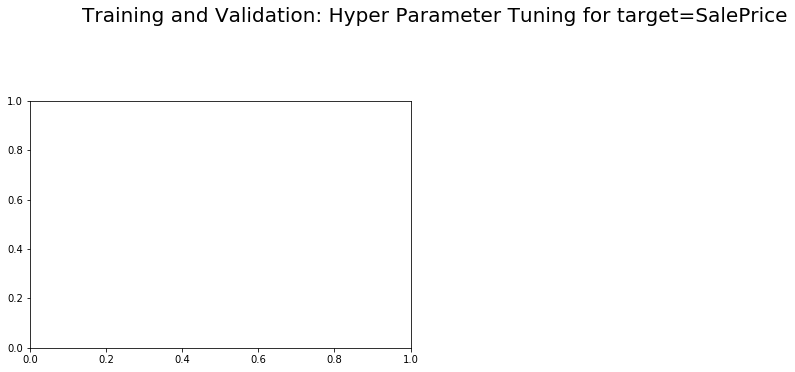

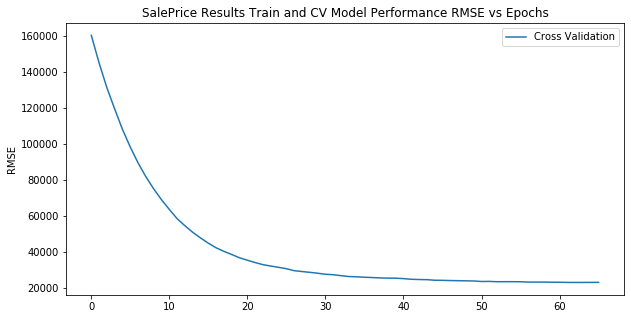

    Time taken for this Target (in seconds) = 57


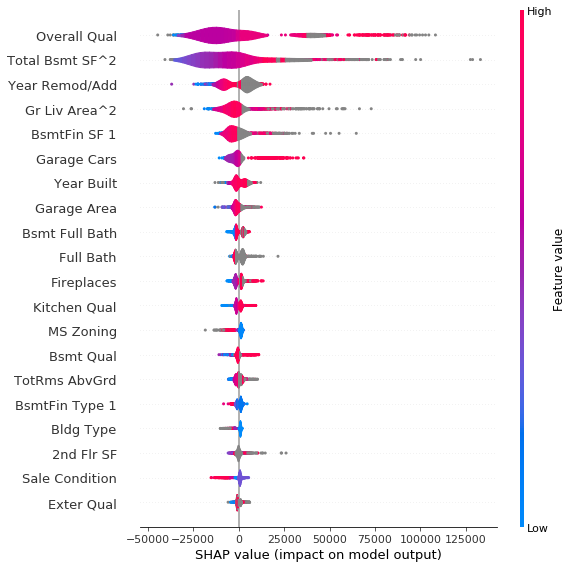

Plotting SHAP (SHapley Additive exPlanations) values to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Leaving Top 8 continuous variables as is...
    No Entropy Binning specified
Number of numeric variables = 8
    No variables were removed since no highly correlated variables found in data
    Adding 35 categorical variables to reduced numeric variables  of 8
Selected No. of variables = 43 
Finding Important Features...
        in 43 variables
[20:04:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
        in 34 variables
[20:04:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
        in 25 variables
[20:04:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

In [4]:
model_home, features_home, trainm_home, testm_home = Auto_ViML(train, 'SalePrice', test, verbose=2, scoring_parameter='r2', Boosting_Flag=True, Add_Poly=2)

# IBM Watson HR

In [17]:
hr_df = pd.read_csv('data/watson_eng.csv')
hr_df.Attrition = hr_df.Attrition.replace('Yes', 1).replace('No', 0)
hr_df.drop('Unnamed: 0', axis=1, inplace=True)
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ResearchTravelRare,YearsNoChange
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,3,...,0,8,0,1,6,4,0,5,0,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,2,...,1,10,3,3,10,7,1,7,0,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,2,...,0,7,3,3,0,0,0,0,1,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,3,...,0,8,3,3,8,7,3,0,0,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,3,...,1,6,3,3,2,2,2,2,1,2


In [18]:
df = hr_df.copy(deep=True)

test_sample = df.sample(int(df.shape[0] * .20), random_state=99)
train, test = df[~df.isin(test_sample)].dropna(), df[df.isin(test_sample)].dropna()

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 2 to 1469
Data columns (total 30 columns):
Age                         294 non-null float64
Attrition                   294 non-null float64
BusinessTravel              294 non-null object
DailyRate                   294 non-null float64
Department                  294 non-null object
DistanceFromHome            294 non-null float64
Education                   294 non-null float64
EducationField              294 non-null object
EnvironmentSatisfaction     294 non-null float64
JobInvolvement              294 non-null float64
JobLevel                    294 non-null float64
JobRole                     294 non-null object
JobSatisfaction             294 non-null float64
MaritalStatus               294 non-null object
MonthlyIncome               294 non-null float64
NumCompaniesWorked          294 non-null float64
OverTime                    294 non-null object
PercentSalaryHike           294 non-null float64
PerformanceRating 

Train (Size: 1176,30) has Single_Label with target: ['Attrition']
"
 ################### Binary-Class ##################### " 
Shuffling the data set before training
 Class  -> Counts -> Percent
   0.0:     991  ->   84.3%
   1.0:     185  ->   15.7%
Selecting 2-Class Classifier...
    Using GridSearchCV for Hyper Parameter tuning...
    Target Attrition is already numeric. No transformation done.
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  17
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    29 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no 

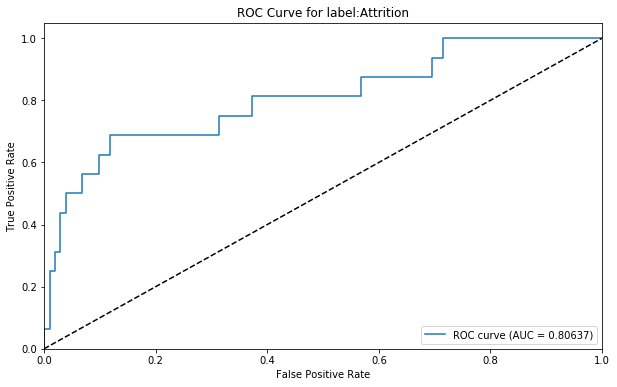

Average precision-recall score: 0.85
Macro F1 score, averaged over all classes: 0.66


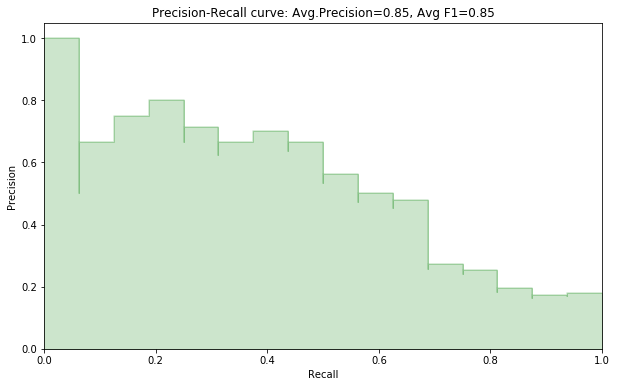

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 88.983%
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       102
         1.0       0.71      0.31      0.43        16

    accuracy                           0.89       118
   macro avg       0.81      0.65      0.69       118
weighted avg       0.88      0.89      0.87       118

[[100   2]
 [ 11   5]]

Single Model is better than Ensembling Models for this data set.
Could not plot Cross Validation Parameters


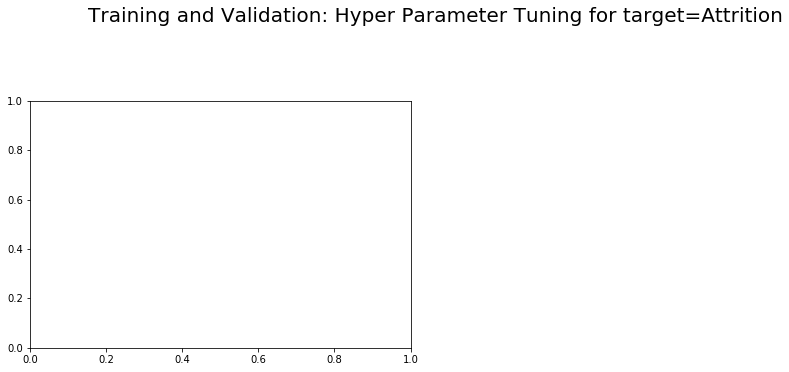

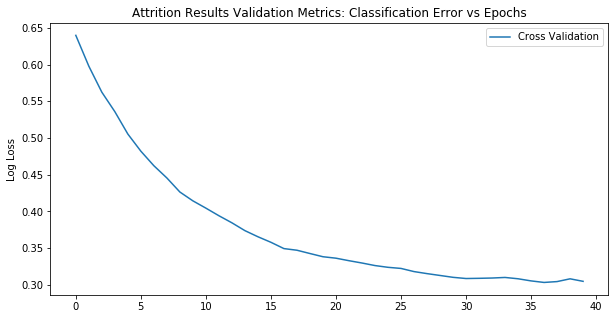

    Time taken for this Target (in seconds) = 18


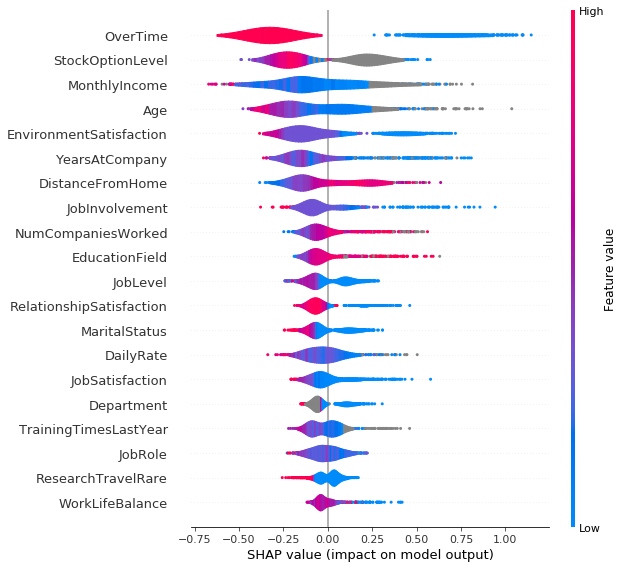

Plotting SHAP (SHapley Additive exPlanations) values to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
Leaving Top 6 continuous variables as is...
    No Entropy Binning specified
Number of numeric variables = 6
    No variables were removed since no highly correlated variables found in data
    Adding 20 categorical variables to reduced numeric variables  of 6
Selected No. of variables = 26 
Finding Important Features...
        in 26 variables
        in 21 variables
        in 16 variables
        in 11 variables
        in 6 variables
        in 1 variables
    Found 26 important features
Test Data predictions using Best Threshold = 0.36
    Adding output files to current folder: ./Attrition/Attrition_Binary_Classification_test_modified.csv
    Adding output files to current folder: ./Attrition/Attrition_Binary_Classification_submission.csv


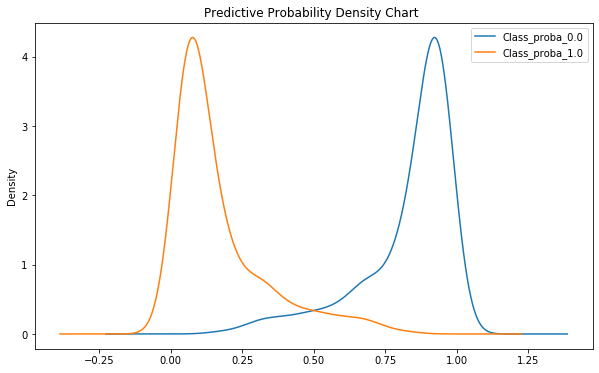

In [19]:
model_hr, features_hr, trainm_hr, testm_hr = Auto_ViML(train, 'Attrition', test, verbose=2, Boosting_Flag=True)